### Stability of 2D mass fit with parallel processing

A 2D fit to D nad B masses is performed. The calculation of the per event likelihood is parallelized using OpenMP. Stabillity of summation of individula likelihoods is evaluated.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_sig_all = pd.read_csv("results_all.csv")
df_sig_fix = pd.read_csv("results_fixed.csv")
df_scan_all = pd.read_csv("param_scan_all.csv")
df_scan_fix = pd.read_csv("param_scan_fixed.csv")

In [3]:
df_sig_all

,value,sigma
0,7.523314,0.878898
1,8.065683,0.577957
2,7.424326,0.558466
3,7.546043,0.861911
4,8.090760,0.569782
5,7.554215,0.153881
6,7.607963,0.584366
7,8.239849,1.770712
8,7.584990,0.534558


Text(0.5, 1.0, 'Parallel fit variance - all params')

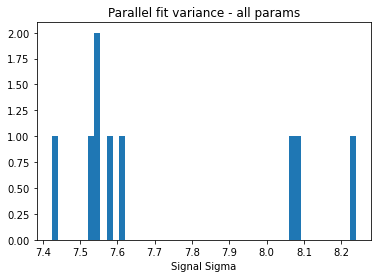

In [4]:
plt.hist(df_sig_all["value"], bins=50)
plt.xlabel("Signal Sigma")
plt.title("Parallel fit variance - all params")

Text(0.5, 1.0, 'Parallel fit variance - DM fixed')

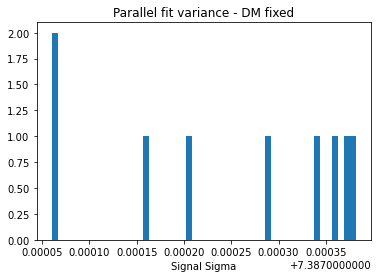

In [5]:
plt.hist(df_sig_fix["value"], bins=50)
plt.xlabel("Signal Sigma")
plt.title("Parallel fit variance - DM fixed")

In [6]:
df_run1_all = df_scan_all[df_scan_all["run"] == 1]
df_run2_all = df_scan_all[df_scan_all["run"] == 2]
df_run3_all = df_scan_all[df_scan_all["run"] == 3]

Text(0.5, 1.0, 'Parallel fit search trajectory - all params')

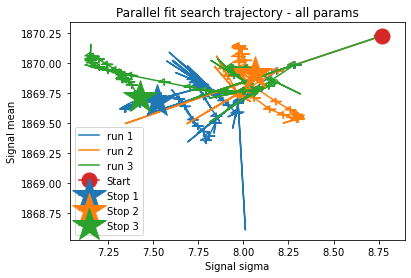

In [7]:
plt.plot(df_run1_all[" mean"], df_run1_all[" sigma"], label="run 1")
plt.plot(df_run2_all[" mean"], df_run2_all[" sigma"], label="run 2")
plt.plot(df_run3_all[" mean"], df_run3_all[" sigma"], label="run 3")
plt.plot(df_run1_all[" mean"][:1], df_run1_all[" sigma"][:1], marker='o', markersize=15, label="Start")
plt.plot(df_run1_all[" mean"][-1:], df_run1_all[" sigma"][-1:], marker='*', markersize=35, label="Stop 1", color="tab:blue")
plt.plot(df_run2_all[" mean"][-1:], df_run2_all[" sigma"][-1:], marker='*', markersize=35, label="Stop 2", color="tab:orange")
plt.plot(df_run3_all[" mean"][-1:], df_run3_all[" sigma"][-1:], marker='*', markersize=35, label="Stop 3", color="tab:green")
plt.legend()
plt.xlabel("Signal sigma")
plt.ylabel("Signal mean")
plt.title("Parallel fit search trajectory - all params")

In [8]:
df_run1_fix = df_scan_fix[df_scan_fix["run"] == 1]
df_run2_fix = df_scan_fix[df_scan_fix["run"] == 2]
df_run3_fix = df_scan_fix[df_scan_fix["run"] == 3]

Text(0.5, 1.0, 'Parallel fit search trajectory - DM fixed')

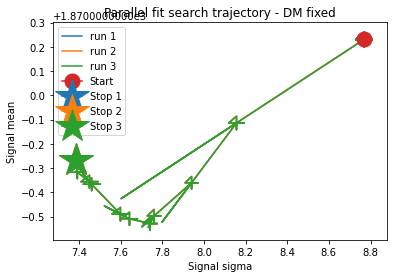

In [9]:
plt.plot(df_run1_fix[" mean"], df_run1_fix[" sigma"], label="run 1")
plt.plot(df_run2_fix[" mean"], df_run2_fix[" sigma"], label="run 2")
plt.plot(df_run3_fix[" mean"], df_run3_fix[" sigma"], label="run 3")
plt.plot(df_run1_fix[" mean"][:1], df_run1_fix[" sigma"][:1], marker='o', markersize=15, label="Start")
plt.plot(df_run1_fix[" mean"][-1:], df_run1_fix[" sigma"][-1:], marker='*', markersize=35, label="Stop 1", color="tab:blue")
plt.plot(df_run2_fix[" mean"][-1:], df_run2_fix[" sigma"][-1:], marker='*', markersize=35, label="Stop 2", color="tab:orange")
plt.plot(df_run3_fix[" mean"][-1:], df_run3_fix[" sigma"][-1:], marker='*', markersize=35, label="Stop 3", color="tab:green")
plt.legend()
plt.xlabel("Signal sigma")
plt.ylabel("Signal mean")
plt.title("Parallel fit search trajectory - DM fixed")

Text(0.5, 1.0, 'Parallel fit search trajectory - DM fixed (STOP)\n')

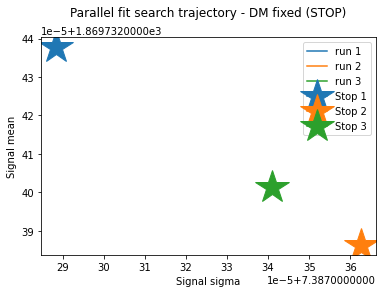

In [10]:
plt.plot(df_run1_fix[" mean"][-52:], df_run1_fix[" sigma"][-52:], label="run 1")
plt.plot(df_run2_fix[" mean"][-52:], df_run2_fix[" sigma"][-52:], label="run 2")
plt.plot(df_run3_fix[" mean"][-52:], df_run3_fix[" sigma"][-52:], label="run 3")
plt.plot(df_run1_fix[" mean"][-1:], df_run1_fix[" sigma"][-1:], marker='*', markersize=35, label="Stop 1", color="tab:blue")
plt.plot(df_run2_fix[" mean"][-1:], df_run2_fix[" sigma"][-1:], marker='*', markersize=35, label="Stop 2", color="tab:orange")
plt.plot(df_run3_fix[" mean"][-1:], df_run3_fix[" sigma"][-1:], marker='*', markersize=35, label="Stop 3", color="tab:green")
plt.legend()
plt.xlabel("Signal sigma")
plt.ylabel("Signal mean")
plt.title("Parallel fit search trajectory - DM fixed (STOP)\n")

In [26]:
df_chi2 = pd.read_csv("chi2_add.csv")

In [27]:
df_chi2.columns

Index(['chi2_kahan_long', ' chi2_std', ' chi2_std_long', ' chi2_kahan',
       ' chi2_kahan_avx'],
      dtype='object')

In [28]:
diff_long = df_chi2["chi2_kahan_long"] - df_chi2[" chi2_std_long"]

Text(0.5, 1.0, 'Chi2 error')

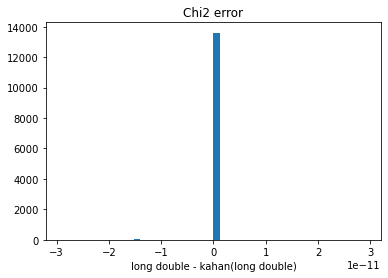

In [29]:
plt.hist(diff_long, bins=50)
plt.xlabel("long double - kahan(long double)")
plt.title("Chi2 error")

In [30]:
diff_std = df_chi2["chi2_kahan_long"] - df_chi2[" chi2_std"]

Text(0.5, 1.0, 'Chi2 error')

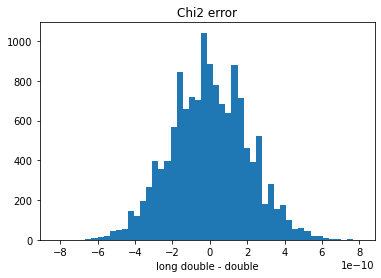

In [31]:
plt.hist(diff_std, bins=50)
plt.xlabel("long double - double")
plt.title("Chi2 error")

In [32]:
diff_kahan = df_chi2["chi2_kahan_long"] - df_chi2[" chi2_kahan"]

Text(0.5, 1.0, 'Chi2 error')

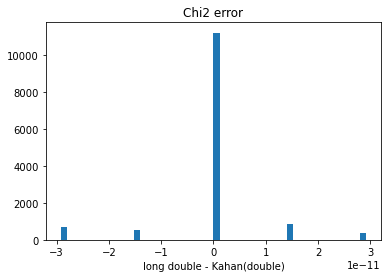

In [33]:
plt.hist(diff_kahan, bins=50)
plt.xlabel("long double - Kahan(double)")
plt.title("Chi2 error")

In [34]:
diff_avx = df_chi2["chi2_kahan_long"] - df_chi2[" chi2_kahan_avx"]

Text(0.5, 1.0, 'Chi2 error')

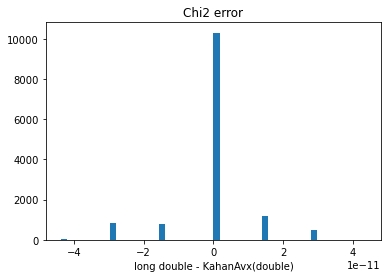

In [35]:
plt.hist(diff_avx, bins=50)
plt.xlabel("long double - KahanAvx(double)")
plt.title("Chi2 error")

In [36]:
diff_avx_kahan = df_chi2[" chi2_kahan"] - df_chi2[" chi2_kahan_avx"]

Text(0.5, 1.0, 'Chi2 error')

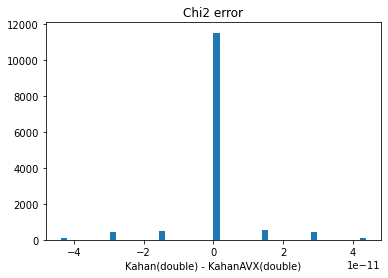

In [37]:
plt.hist(diff_avx_kahan, bins=50)
plt.xlabel("Kahan(double) - KahanAVX(double)")
plt.title("Chi2 error")

In [42]:
accumulators = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
times = np.array([121.23, 197.96, 198.11, 117.46, 98.31, 122.88, 77.05, 117.12, 137.80])
calls = np.array([13665, 22356, 22356, 13140, 12911, 13834, 13365, 13196, 15530])

corr_times = times/calls * 1000

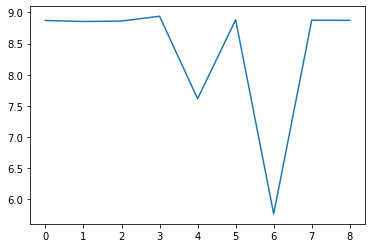

In [43]:
plt.plot(accumulators, corr_times)

In [44]:
accumulators = np.array([0, 4, 8])
times = np.array([138.45, 132.55, 119.45])
calls = np.array([15089, 14489, 12965])

corr_times = times/calls * 1000

Text(0.5, 1.0, 'Avarage Chi2 func call time')

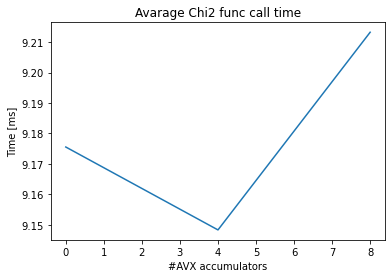

In [46]:
plt.plot(accumulators, corr_times)
plt.xlabel("#AVX accumulators")
plt.ylabel("Time [ms]")
plt.title("Avarage Chi2 func call time")

In [47]:
df_kahan_time = pd.read_csv("1e4_kahan_time.csv")

In [48]:
df_kahan_time.columns

Index(['serial', ' avx'], dtype='object')

Text(0.5, 1.0, 'Serial kahan algorithm time')

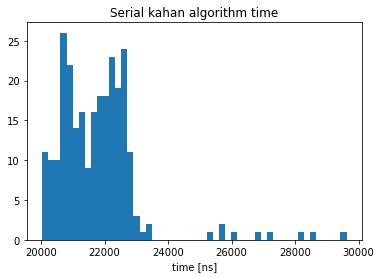

In [51]:
plt.hist(df_kahan_time["serial"], bins=50)
plt.xlabel("time [ns]")
plt.title("Serial kahan algorithm time")

Text(0.5, 1.0, 'AVX kahan algorithm time (8 accumulators)')

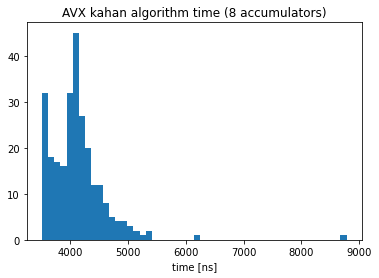

In [53]:
plt.hist(df_kahan_time[" avx"], bins=50)
plt.xlabel("time [ns]")
plt.title("AVX kahan algorithm time (8 accumulators)")